In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

Source: 
* https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d
* https://openai.com/blog/evolution-strategies/
* https://github.com/karpathy/randomfun/blob/master/es.ipynb

In [2]:
def f(w):
    ''' Function we want to optimize'''
    reward = -np.sum(np.square(solution - w))
    return reward

In [3]:
# hyperparameters
npop = 50 # population size
sigma = 0.1 # noise standard deviation
alpha = 0.001 # learning rate

In [4]:
solution = np.array([0.5, 0.1, -0.3])

In [5]:
w = np.random.randn(3) # our initial guess is random
w

array([0.21903737, 1.58495806, 1.16476673])

In [108]:
for i in range(300):

  # print current fitness of the most likely parameter setting
  if i % 20 == 0:
    print('iter %d. w: %s, solution: %s, reward: %f' % 
          (i, str(w), str(solution), f(w)))

  # initialize memory for a population of w's, and their rewards
  N = np.random.randn(npop, 3) # samples from a normal distribution N(0,1)
  R = np.zeros(npop)
  for j in range(npop):
    w_try = w + sigma*N[j] # jitter w using gaussian of sigma 0.1
    R[j] = f(w_try) # evaluate the jittered version

  # standardize the rewards to have a gaussian distribution
  A = (R - np.mean(R)) / np.std(R)
  # perform the parameter update. The matrix multiply below
  # is just an efficient way to sum up all the rows of the noise matrix N,
  # where each row N[j] is weighted by A[j]
  w = w + alpha/(npop*sigma) * np.dot(N.T, A)

iter 0. w: [ 0.49488302  0.10967936 -0.2939929 ], solution: [ 0.5  0.1 -0.3], reward: -0.000156
iter 20. w: [ 0.49505681  0.10927343 -0.29262318], solution: [ 0.5  0.1 -0.3], reward: -0.000165
iter 40. w: [ 0.4919457   0.11178502 -0.29328507], solution: [ 0.5  0.1 -0.3], reward: -0.000249
iter 60. w: [ 0.49272462  0.11263256 -0.29326337], solution: [ 0.5  0.1 -0.3], reward: -0.000258
iter 80. w: [ 0.49457307  0.11118858 -0.2922606 ], solution: [ 0.5  0.1 -0.3], reward: -0.000215
iter 100. w: [ 0.49509151  0.1097203  -0.2916546 ], solution: [ 0.5  0.1 -0.3], reward: -0.000188
iter 120. w: [ 0.49512194  0.1123768  -0.29489021], solution: [ 0.5  0.1 -0.3], reward: -0.000203
iter 140. w: [ 0.49359941  0.11036903 -0.29391885], solution: [ 0.5  0.1 -0.3], reward: -0.000185
iter 160. w: [ 0.49769932  0.10988486 -0.29412631], solution: [ 0.5  0.1 -0.3], reward: -0.000138
iter 180. w: [ 0.5002838   0.10934419 -0.29609952], solution: [ 0.5  0.1 -0.3], reward: -0.000103
iter 200. w: [ 0.49689247 

array([-2.44277878, -0.70884434,  0.02404761, -0.66211551,  0.63253537,
        0.04860538,  0.41239431,  0.92808226,  1.10139002,  0.66668367])

Try with 2 dimensions

In [7]:
global_max = np.array([3,2])

In [8]:
def get_reward(global_max, position)-> float:
    return np.sum(np.square(global_max - position))

In [9]:
initial_pos = np.random.uniform(0,10,2)
initial_pos

array([0.81067321, 0.18750091])

In [10]:
get_reward(global_max, initial_pos)

8.078304722753785

In [11]:
pop = 10
sig = 0.1 # noise standard deviation
al = 0.001 # learning rate

In [12]:
_N = np.array([np.random.uniform(0,10,2) for _ in range(pop)])
_N

array([[8.26439145, 0.49071592],
       [4.89664033, 8.03210975],
       [9.048935  , 4.36914756],
       [7.0146537 , 1.81266399],
       [5.94068701, 7.84038939],
       [4.9800189 , 0.94938025],
       [1.4364837 , 3.12052728],
       [4.01127681, 9.58392772],
       [8.58570323, 6.19352172],
       [3.63166687, 6.11591468]])

In [13]:
rewards = np.zeros(pop)
rewards

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
_N[0], sig * _N[0], initial_pos+(sig * _N[0]) 

(array([8.26439145, 0.49071592]),
 array([0.82643914, 0.04907159]),
 array([1.63711236, 0.2365725 ]))

In [15]:
jittered_pos = np.array([initial_pos + (sig * n) for n in _N])
jittered_pos

array([[1.63711236, 0.2365725 ],
       [1.30033725, 0.99071189],
       [1.71556671, 0.62441567],
       [1.51213858, 0.36876731],
       [1.40474192, 0.97153985],
       [1.3086751 , 0.28243894],
       [0.95432158, 0.49955364],
       [1.2118009 , 1.14589368],
       [1.66924354, 0.80685308],
       [1.1738399 , 0.79909238]])

In [16]:
for i, jit_pos in enumerate(jittered_pos):
    rewards[i] = get_reward(global_max, jit_pos)

In [17]:
rewards

array([4.96713926, 3.90751597, 3.54200112, 4.87465168, 3.60257864,
       5.81059591, 6.43613946, 3.92715364, 3.19451233, 4.77703982])

In [18]:
# standardize the rewards to have a gaussian distribution
#   A = (R - np.mean(R)) / np.std(R)
standard_rewards = (rewards-np.mean(rewards))/np.std(rewards)
standard_rewards

array([ 0.46301917, -0.59617564, -0.96154268,  0.37056899, -0.90098967,
        1.30613475,  1.93142535, -0.57654591, -1.30889096,  0.2729966 ])

In [19]:
# perform the parameter update. The matrix multiply below
# is just an efficient way to sum up all the rows of the noise matrix N,
# where each row N[j] is weighted by A[j]
#   w = w + alpha/(npop*sigma) * np.dot(N.T, A)

al/(pop * sig)

0.001

In [20]:
new_pos = initial_pos + al/(pop * sig) * np.dot(_N.T, standard_rewards)
new_pos

array([0.79684654, 0.16765055])

In [21]:
get_reward(global_max, initial_pos), get_reward(global_max, new_pos)

(8.078304722753785, 8.211389676343256)

In [22]:
global_max, initial_pos, new_pos

(array([3, 2]),
 array([0.81067321, 0.18750091]),
 array([0.79684654, 0.16765055]))

In [48]:
# Not used
def get_neighbours(index:tuple, neighbourhood:str) -> list[tuple]:
    ''' Source: https://fastlife.readthedocs.io/en/latest/notes/neighborhoods.html '''
    # goal = 5,5
    assert neighbourhood == 'von_neumann' or neighbourhood == 'moore', "neighbourhood should be 'von_neumann' or 'moore'"  

    index_offset = {'von_neumann': [(-1,0), (0,1), (1,0),(0,-1)],
                    'moore': [(-1,0), (-1,1), (0,1), (1,1), (1,0), (1, -1), (0,-1), (-1,-1)]} 

    indices = [(index[0] + row, index[1] + col) for row, col in index_offset[neighbourhood]]
    return indices

In [49]:
get_neighbours(index=(5,5), neighbourhood='moore')

[(4, 5), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (5, 4), (4, 4)]

In [54]:
def wavefront(index:tuple, matrix:np.ndarray)-> np.ndarray:
    ''' Uses Depth First approach to make an array with values that that concentrically 
        increase from a given index tuple'''

    assert index[0] < matrix.shape[0] and index[1] < matrix.shape[1], f"The index values need to be <= {matrix.shape}"
    
    zero_mat = np.zeros(matrix.shape)
    unvisited = [(row, col) for row in np.arange(matrix.shape[0]) for col in np.arange(matrix.shape[1])] 
    
    offset_1 = 1 # Get 1 less than the index value
    offset_2 = 2 # Get 1 more than the index value
    val = 1

    while unvisited:
        for row in range(index[0] - offset_1, index[0] + offset_2):
            for col in range(index[1] - offset_1, index[1] + offset_2):
                if 0 <= row < matrix.shape[0] \
                    and 0 <= col <matrix.shape[1] \
                    and (row, col) in unvisited:
                    zero_mat[row][col] = val
                    unvisited.remove((row, col))
        offset_1 += 1
        offset_2 += 1
        val += 1

    zero_mat[index] = 0 # Set the index to zero
    return zero_mat

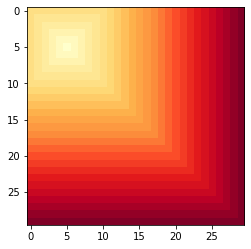

In [57]:
m = wavefront(index=(5,5), matrix=np.arange(900).reshape(30,30))
fig, ax = plt.subplots()
im = ax.imshow(m, cmap='YlOrRd')

In [61]:
m = wavefront(index=(5,5), matrix=np.arange(225).reshape(15,15))
m

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 7., 8., 9.],
       [5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 6., 7., 8., 9.],
       [5., 4., 3., 3., 3., 3., 3., 3., 3., 4., 5., 6., 7., 8., 9.],
       [5., 4., 3., 2., 2., 2., 2., 2., 3., 4., 5., 6., 7., 8., 9.],
       [5., 4., 3., 2., 1., 1., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [5., 4., 3., 2., 1., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [5., 4., 3., 2., 1., 1., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [5., 4., 3., 2., 2., 2., 2., 2., 3., 4., 5., 6., 7., 8., 9.],
       [5., 4., 3., 3., 3., 3., 3., 3., 3., 4., 5., 6., 7., 8., 9.],
       [5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 6., 7., 8., 9.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 7., 8., 9.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 8., 9.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8., 9.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9.],
       [9., 9., 9., 9., 9., 9., 9.

In [117]:
npop = 10 # population size
sigma = 1 # noise standard deviation
alpha = 0.001 # learning rate

goal = np.array([5,5])
start_pos = np.array([25,25])


pop = np.random.randn(npop, start_pos.size)
jittered_pop = np.array([start_pos + sigma * p for p in pop])
jittered_pop    

array([[25.84229681, 25.74859026],
       [25.18457937, 23.73553171],
       [24.45171361, 25.24879283],
       [25.46790166, 25.96422737],
       [26.15413211, 25.19628818],
       [24.42125247, 27.22589072],
       [25.58502356, 25.60030329],
       [24.78635844, 23.23094316],
       [26.62858467, 23.11860604],
       [24.67525038, 25.81613249]])

In [101]:
def calc_reward(goal:tuple, position:tuple) -> float:
    # return np.linalg.norm(np.asarray(goal) - np.asarray(position))
    return -np.sum(np.square(np.asarray(goal) - np.asarray(position)))

In [102]:
calc_reward(goal=(5,5), position=(0,1))

-41

In [111]:
# R[j] = f(w_try) # evaluate the jittered version

rewards_array = np.array([calc_reward(goal=goal, position=jit) for jit in jittered_pop])
rewards_array

array([-728.20272156, -768.5245714 , -798.11532594, -798.95906283,
       -775.7259531 , -773.46015137, -698.96280889, -825.11201882,
       -807.18357065, -761.98506919])

In [116]:
# standardize the rewards to have a gaussian distribution
# A = (R - np.mean(R)) / np.std(R)
std_rewards = (rewards_array - np.mean(rewards_array))/np.std(rewards_array)
std_rewards

array([ 1.26843685,  0.14238521, -0.68398356, -0.70754626, -0.0587248 ,
        0.00455131,  2.08500781, -1.43790905, -0.93722869,  0.32501119])

In [159]:
# perform the parameter update. The matrix multiply below
# is just an efficient way to sum up all the rows of the noise matrix N,
# where each row N[j] is weighted by A[j]

new_pos = start_pos + alpha/(npop*sigma) * np.dot(jittered_pop.T, std_rewards)
new_pos

array([25.00009633, 25.00057396])

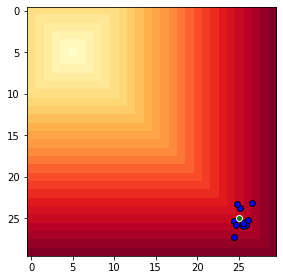

In [161]:
fig, ax = plt.subplots()
im = ax.imshow(mat, cmap='YlOrRd')
for jit in jittered_pop:
    ax.scatter(x=jit[0], y = jit[1], c='blue', edgecolors='black')

ax.scatter(*new_pos, c='green', edgecolors='white')

fig.tight_layout()
plt.show()

In [44]:
from matplotlib.animation import FuncAnimation
from itertools import count
# from IPython.display import HTML

In [ ]:
x_vals = []
y_vals = []

index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0,5))

    plt.cla()
    plt.scatter(x_vals, y_vals)

anim = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()



In [4]:
arr = np.array([[25.84229681, 25.74859026],
       [25.18457937, 23.73553171],
       [24.45171361, 25.24879283],
       [25.46790166, 25.96422737],
       [26.15413211, 25.19628818],
       [24.42125247, 27.22589072],
       [25.58502356, 25.60030329],
       [24.78635844, 23.23094316],
       [26.62858467, 23.11860604],
       [24.67525038, 25.81613249]])

In [14]:
arr.shape

(10, 2)

In [16]:
arr[:,0]

array([25.84229681, 25.18457937, 24.45171361, 25.46790166, 26.15413211,
       24.42125247, 25.58502356, 24.78635844, 26.62858467, 24.67525038])

In [8]:
import pandas as pd

In [51]:
df = pd.DataFrame(columns=['Iteration','x','y'], index=range(5))

In [53]:
df

,Iteration,x,y
0,0,"[25.84229681, 25.18457937, 24.45171361, 25.467...","[25.74859026, 23.73553171, 25.24879283, 25.964..."
1,1,"[25.84229681, 25.18457937, 24.45171361, 25.467...","[25.74859026, 23.73553171, 25.24879283, 25.964..."
2,2,"[25.84229681, 25.18457937, 24.45171361, 25.467...","[25.74859026, 23.73553171, 25.24879283, 25.964..."
3,3,"[25.84229681, 25.18457937, 24.45171361, 25.467...","[25.74859026, 23.73553171, 25.24879283, 25.964..."
4,4,"[25.84229681, 25.18457937, 24.45171361, 25.467...","[25.74859026, 23.73553171, 25.24879283, 25.964..."


In [123]:
def calc_distance(goal:np.ndarray, position:np.ndarray) -> float:
    return np.sqrt((goal[0] - position[0])**2 + (goal[1] - position[1])**2 )

In [124]:
def set_constricted_velocity():
    c1 = 2.05
    c2 = 2.05
    ep = c1+c2
    X = 2/(abs(2-ep-np.sqrt((ep**2)-4*ep)))
    
    cognitive = (c1 * np.random.uniform(0, 1, dims)*(particle['pbest_pos'] - particle['position']))
    informers = (c2 * np.random.uniform(0, 1, dims)*(particle['lbest_pos'] - particle['position']))
    new_velocity = X*(particle['velocity'] + cognitive + informers)
    particle['velocity'] = new_velocity

In [87]:
def pso() -> tuple:
    goal = np.array([5,5])
    num_particles = 20
    dims = 2
    particles = np.random.uniform(low=0, high=30, size=(num_particles, dims))
    informant_indicies = np.array([np.take(np.arange(num_particles),(i-1, i+1), mode='wrap') for i in np.arange(num_particles)])
    pbest_pos = np.empty(particles.shape)
    pbest_val = np.ones(num_particles) * np.inf
    lbest_val = np.ones(num_particles) * np.inf
    lbest_pos = np.empty(particles.shape)
    gbest_val = np.inf
    gbest_pos = np.ones(goal.shape) * np.inf
    gbest_particle_index = None

    # Main loop
    fitness = np.array([calc_distance(goal=goal,  position=particle) for particle in particles])
    # set pbest_val
    pbest_val = np.where(fitness < pbest_val, fitness, pbest_val)
    # Set pbest_pos
    np.put(pbest_pos, np.where(fitness < pbest_val)[0], particles)
    # Set lbest
    for particle_index, informers in zip(np.arange(num_particles), informant_indicies):
        # If informant's pbest_val > particle's lbest_val
        if (pbest_val[informers[0]] < lbest_val[particle_index]) or \
            (pbest_val[informers[1]] < lbest_val[particle_index]):
            # -> particle's lbest_val = informant's pbest_val
            best_informer_index = informers[np.argmin(pbest_val[informers])]
            lbest_val[particle_index] = pbest_val[best_informer_index]
            lbest_pos[particle_index] = pbest_pos[best_informer_index]
    # Set gbest
    gbest_particle_index = np.argmin(fitness)
    gbest_pos = particles[gbest_particle_index]
    gbest_val = fitness[gbest_particle_index]        
    
    

    return informant_indicies
            

    
    

In [88]:
pso()

array([[19,  1],
       [ 0,  2],
       [ 1,  3],
       [ 2,  4],
       [ 3,  5],
       [ 4,  6],
       [ 5,  7],
       [ 6,  8],
       [ 7,  9],
       [ 8, 10],
       [ 9, 11],
       [10, 12],
       [11, 13],
       [12, 14],
       [13, 15],
       [14, 16],
       [15, 17],
       [16, 18],
       [17, 19],
       [18,  0]])

In [46]:
calc_distance(np.array([6.31063069, 6.72114602]), np.array([5,5]))

2.1633530520309705

In [48]:
parts = np.random.uniform(low=0, high=30, size=(20, 2))
parts

array([[25.25791723, 24.52755071],
       [ 6.11024161,  9.59787723],
       [28.98238442, 24.8697903 ],
       [14.4151057 , 24.08254758],
       [10.50367125, 17.06815461],
       [28.1561452 , 24.99435049],
       [19.94160948,  1.01880611],
       [21.40140195, 22.03858221],
       [ 9.1742276 ,  7.28627996],
       [20.4254803 , 20.00153352],
       [20.04141945,  0.42690186],
       [11.62730261,  5.01892   ],
       [ 5.75252879,  8.10488291],
       [ 6.11757658, 27.47950631],
       [10.17172847, 23.30901759],
       [25.76017728,  2.56262943],
       [28.1430658 ,  5.97941697],
       [28.8060539 , 11.21817323],
       [ 3.51418195, 13.17626604],
       [ 0.77435761,  3.66240162]])

In [31]:
fit = np.array([20.4950155 , 28.65251147, 24.14234269, 16.99274364,  9.79771521,
       18.1759792 , 24.55855639, 24.45355296,  6.61459907, 28.66546622,
        8.75243308, 26.20477608, 15.01744575, 14.63521315, 26.63335077,
       31.3133635 , 21.20746319, 21.4050256 , 30.60094069, 22.87279168])

In [79]:
pbest_val = np.array([15.52002815, 13.039729  , 12.07417024, 16.70268253, 28.57970691,
       32.35257397, 13.02596413, 14.87316226, 25.66886481, 23.27108829,
       20.31792231, 25.03099249, 10.4059248 , 20.87568664,  8.90513222,
        5.06949464, 10.31977383, 17.37688602, 11.97188606, 24.00551617])
pbest_val

array([15.52002815, 13.039729  , 12.07417024, 16.70268253, 28.57970691,
       32.35257397, 13.02596413, 14.87316226, 25.66886481, 23.27108829,
       20.31792231, 25.03099249, 10.4059248 , 20.87568664,  8.90513222,
        5.06949464, 10.31977383, 17.37688602, 11.97188606, 24.00551617])

In [81]:
lbest_val = np.array([20.4950155 , 28.65251147, 24.14234269, 16.99274364,  9.79771521,
       18.1759792 , 24.55855639, 24.45355296,  6.61459907, 28.66546622,
        8.75243308, 26.20477608, 15.01744575, 14.63521315, 26.63335077,
       31.3133635 , 21.20746319, 21.4050256 , 30.60094069, 22.87279168])
lbest_val

array([20.4950155 , 28.65251147, 24.14234269, 16.99274364,  9.79771521,
       18.1759792 , 24.55855639, 24.45355296,  6.61459907, 28.66546622,
        8.75243308, 26.20477608, 15.01744575, 14.63521315, 26.63335077,
       31.3133635 , 21.20746319, 21.4050256 , 30.60094069, 22.87279168])

In [64]:
informers= np.array([18, 19,  0])

In [82]:
pbest_val[informers]

array([11.97188606, 24.00551617, 15.52002815])

In [83]:
if pbest_val[informers[-1]] < pbest_val[informers[1]] or pbest_val[informers[0]] < pbest_val[informers[1]]:
    print(np.argmin(fit[informers]))

2


In [90]:
# If informant's pbest_val > particle's lbest_val
# -> particle's lbest_val = informant's pbest_val
# lbest_val[19] = pbest[2] 
# -> particles' lbest_pos = informants's pbest_pos
# lbest_pos[19] = pbest_pos[2]

In [93]:
inf_inds = np.array([[19,  1],
       [ 0,  2],
       [ 1,  3],
       [ 2,  4],
       [ 3,  5],
       [ 4,  6],
       [ 5,  7],
       [ 6,  8],
       [ 7,  9],
       [ 8, 10],
       [ 9, 11],
       [10, 12],
       [11, 13],
       [12, 14],
       [13, 15],
       [14, 16],
       [15, 17],
       [16, 18],
       [17, 19],
       [18,  0]])

In [121]:
for particle_index, (infs) in zip(np.arange(20), inf_inds):
    print(particle_index, infs)
    if (pbest_val[infs[1]] < lbest_val[particle_index]) or (pbest_val[infs[0]] < lbest_val[particle_index]): 
        # print(np.argmin(pbest_val[infs]))
        print(f'informant:{infs[np.argmin(pbest_val[infs])]}')
        
    else:
        print(f'Particle {particle_index} is better')
        # print(np.argmin(pbest_val[infs]))

0 [19  1]
informant:1
1 [0 2]
informant:2
2 [1 3]
informant:1
3 [2 4]
informant:2
4 [3 5]
Particle 4 is better
5 [4 6]
informant:6
6 [5 7]
informant:7
7 [6 8]
informant:6
8 [7 9]
Particle 8 is better
9 [ 8 10]
informant:10
10 [ 9 11]
Particle 10 is better
11 [10 12]
informant:12
12 [11 13]
Particle 12 is better
13 [12 14]
informant:14
14 [13 15]
informant:15
15 [14 16]
informant:14
16 [15 17]
informant:15
17 [16 18]
informant:16
18 [17 19]
informant:17
19 [18  0]
informant:18


In [120]:
infy = np.array([18,  0])

In [104]:
np.argmin(pbest_val[infy])

0